<a href="https://colab.research.google.com/github/AkihitoIshizuka/test/blob/main/%E7%94%9F%E6%90%8D%E4%BF%9D%EF%BC%88%E6%9D%B1%E8%A8%BC%E3%83%AA%E3%82%B9%E3%83%88%E3%83%BB%E5%85%A8%E9%8A%98%E6%9F%84%E3%83%BB%E7%B5%82%E5%80%A4%EF%BC%91%E6%9C%AC%2BAll%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%83%BB%E3%83%99%E3%83%BC%E3%82%BF%E6%8E%A8%E7%A7%BB%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 東証・生損保（プライム銘柄）ポートフォリオ銘柄のリスク＆リターン分析
### 特に終値データを使用した日経平均株価指数との回帰分析やベータの推移を観察する

In [5]:
!pip install yfinance
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 34.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
# 日本語表示に対応させるためのモジュールインストール
!pip install japanize-matplotlib
# 日本語表示への対応
import japanize_matplotlib  # 日本語化matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 17.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=6c7d83a96709c14c4d6da5c7a5d7781e765ff0ff139166b29981807df478859a
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import xlrd

yf.pdr_override() 

In [8]:
#!wget https://raw.githubusercontent.com/nakachan-ing/finance-streamlit/master/nikkei.csv
#filename = 'nikkei.csv'
#df_list = pd.read_csv(filename, encoding='shift-jis')
#df_list

In [9]:
!wget https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls
#filename = 'data_j.xls'
df_list = pd.read_excel('data_j.xls')
print(df_list)

--2022-10-13 04:01:58--  https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls
Resolving www.jpx.co.jp (www.jpx.co.jp)... 23.13.133.39
Connecting to www.jpx.co.jp (www.jpx.co.jp)|23.13.133.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 774144 (756K) [application/vnd.ms-excel]
Saving to: ‘data_j.xls’

data_j.xls          100%[===================>] 756.00K  --.-KB/s    in 0.05s   

2022-10-13 04:01:59 (13.7 MB/s) - ‘data_j.xls’ saved [774144/774144]

            日付   コード                                   銘柄名       市場・商品区分  \
0     20220930  1301                                    極洋    プライム（内国株式）   
1     20220930  1305                         ダイワ上場投信－トピックス       ETF・ETN   
2     20220930  1306               ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信       ETF・ETN   
3     20220930  1308                     上場インデックスファンドＴＯＰＩＸ       ETF・ETN   
4     20220930  1309  ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信       ETF・ETN   
...        ...   ...        

In [10]:
df_list = df_list[df_list["市場・商品区分"] == "プライム（内国株式）"]
df_list = df_list[df_list["33業種区分"] == "保険業"] 
#                  | df_list['コード'] == '1343']
df_list

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
2932,20220930,7181,かんぽ生命保険,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,4,TOPIX Mid400
3649,20220930,8630,ＳＯＭＰＯホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3661,20220930,8715,アニコム ホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,6,TOPIX Small 1
3662,20220930,8725,ＭＳ＆ＡＤインシュアランスグループホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3669,20220930,8750,第一生命ホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3670,20220930,8766,東京海上ホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,1,TOPIX Core30
3677,20220930,8795,Ｔ＆Ｄホールディングス,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,4,TOPIX Mid400
3678,20220930,8798,アドバンスクリエイト,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,7,TOPIX Small 2


In [11]:
# 銘柄名の変換：持株会社、銀行FG、REIT法人
df_list = df_list.replace('フィナンシャルグループ', 'ＦＧ', regex=True)
df_list = df_list.replace('フィナンシャル・グループ', 'ＦＧ', regex=True)
df_list = df_list.replace('ホールディングス', 'ＨＤ', regex=True)
df_list = df_list.replace('コーポレーション', 'Ｃ', regex=True)
df_list = df_list.replace('グループ', 'Ｇ', regex=True)
df_list = df_list.replace('投資法人', '', regex=True)
df_list

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
2932,20220930,7181,かんぽ生命保険,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,4,TOPIX Mid400
3649,20220930,8630,ＳＯＭＰＯＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3661,20220930,8715,アニコム ＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,6,TOPIX Small 1
3662,20220930,8725,ＭＳ＆ＡＤインシュアランスＧＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3669,20220930,8750,第一生命ＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,2,TOPIX Large70
3670,20220930,8766,東京海上ＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,1,TOPIX Core30
3677,20220930,8795,Ｔ＆ＤＨＤ,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,4,TOPIX Mid400
3678,20220930,8798,アドバンスクリエイト,プライム（内国株式）,7150,保険業,16,金融（除く銀行）,7,TOPIX Small 2


In [12]:
# 不要な銘柄を削除・適正なユニバースのために
#df_list.drop(df_list[ df_list['コード'] == 7337].index, inplace=True)   #7337	ひろぎんＨＤ
#df_list

In [13]:
#df_list['ティッカー'] = str(df_list['コード'].iloc[-1]) + '.T'
df_list['コード']

2932    7181
3649    8630
3661    8715
3662    8725
3669    8750
3670    8766
3677    8795
3678    8798
Name: コード, dtype: int64

In [14]:
# 個別銘のティッカー
#symbols = ['1375.T',	'1799.T',	'1828.T',	'1867.T',	'1899.T',	'2208.T',	'2220.T',	
#           '2221.T',	'2674.T',	'2872.T',	'2904.T',	'2923.T',	'3096.T',	'3865.T',	
#           '4707.T',	'5208.T',	'5446.T',	'5909.T',	'5951.T',	'6164.T',	'6364.T',	
#           '6897.T',	'7287.T',	'7327.T',	'7640.T',	'7816.T',	'7841.T',	'8218.T',	
#           '8255.T',	'8537.T',	'9017.T',	'9355.T',	'9408.T',	'9537.T',	'9842.T', '^N225']
#symbols = ['1375.T',	'1899.T',	'2220.T',	'2674.T',	'2904.T',	'3865.T',	'5208.T',	
#           '6364.T',	'7327.T',	'7816.T',	'8218.T',	'8255.T',	'9842.T', '^N225']
index = '^N225'

df = pd.DataFrame()
for code in df_list['コード']:
    symbol = str(code) + '.T'
#    print(symbol)
    print(df_list[df_list['コード']==code].iloc[-1]['銘柄名'])

    data = pdr.get_data_yahoo(symbol, start = '2019-12-30', end = '2022-12-31')['Adj Close']
#    data.name = symbol
#    data.name = df_list['銘柄名']
    data.name = df_list[df_list['コード']==code].iloc[-1]['銘柄名']
    df = pd.concat([df, data],axis = 1)

data = pdr.get_data_yahoo(index, start = '2019-12-30', end = '2022-12-31')['Adj Close']
data.name = '日経平均株価'
print(data.name)
df = pd.concat([df, data],axis = 1)

かんぽ生命保険
[*********************100%***********************]  1 of 1 completed
ＳＯＭＰＯＨＤ
[*********************100%***********************]  1 of 1 completed
アニコム　ＨＤ
[*********************100%***********************]  1 of 1 completed
ＭＳ＆ＡＤインシュアランスＧＨＤ
[*********************100%***********************]  1 of 1 completed
第一生命ＨＤ
[*********************100%***********************]  1 of 1 completed
東京海上ＨＤ
[*********************100%***********************]  1 of 1 completed
Ｔ＆ＤＨＤ
[*********************100%***********************]  1 of 1 completed
アドバンスクリエイト
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
日経平均株価


In [15]:
for i in np.arange(len(df.index)):
    df.index.values[i] = str(df.index[i].date())

df.index = df.index.rename('Date')
df

,かんぽ生命保険,ＳＯＭＰＯＨＤ,アニコム ＨＤ,ＭＳ＆ＡＤインシュアランスＧＨＤ,第一生命ＨＤ,東京海上ＨＤ,Ｔ＆ＤＨＤ,アドバンスクリエイト,日経平均株価
Date,,,,,,,,,
2019-12-30,1644.468506,3794.762939,915.437805,3138.949219,1625.900269,1843.473145,1242.824951,880.370483,23656.619141
2020-01-06,1629.454590,3724.162598,894.321838,3106.785889,1582.041626,1812.140869,1194.715576,858.023682,23204.859375
2020-01-07,1666.547852,3777.112793,912.953552,3167.635498,1594.125000,1849.498657,1192.933838,867.334839,23575.720703
2020-01-08,1677.145752,3695.922119,891.837646,3154.596191,1548.476318,1818.166382,1170.660889,855.230347,23204.759766
2020-01-09,1725.720459,3731.222412,919.164124,3192.843994,1571.300659,1834.736084,1182.242798,867.800354,23739.869141
...,...,...,...,...,...,...,...,...,...
2022-10-06,2160.000000,6090.000000,561.000000,3953.000000,2375.000000,2642.000000,1437.000000,991.000000,27311.300781
2022-10-07,2151.000000,5992.000000,552.000000,3882.000000,2317.000000,2592.000000,1404.000000,985.000000,27116.109375
2022-10-11,2119.000000,6049.000000,543.000000,3889.000000,2260.000000,2595.500000,1372.000000,970.000000,26401.250000


In [16]:
print(df)

                かんぽ生命保険      ＳＯＭＰＯＨＤ     アニコム　ＨＤ  ＭＳ＆ＡＤインシュアランスＧＨＤ  \
Date                                                                 
2019-12-30  1644.468506  3794.762939  915.437805       3138.949219   
2020-01-06  1629.454590  3724.162598  894.321838       3106.785889   
2020-01-07  1666.547852  3777.112793  912.953552       3167.635498   
2020-01-08  1677.145752  3695.922119  891.837646       3154.596191   
2020-01-09  1725.720459  3731.222412  919.164124       3192.843994   
...                 ...          ...         ...               ...   
2022-10-06  2160.000000  6090.000000  561.000000       3953.000000   
2022-10-07  2151.000000  5992.000000  552.000000       3882.000000   
2022-10-11  2119.000000  6049.000000  543.000000       3889.000000   
2022-10-12  2130.000000  5995.000000  554.000000       3854.000000   
2022-10-13  2096.000000  5929.000000  557.000000       3815.000000   

                 第一生命ＨＤ       東京海上ＨＤ        Ｔ＆ＤＨＤ  アドバンスクリエイト        日経平均株価  
Date       

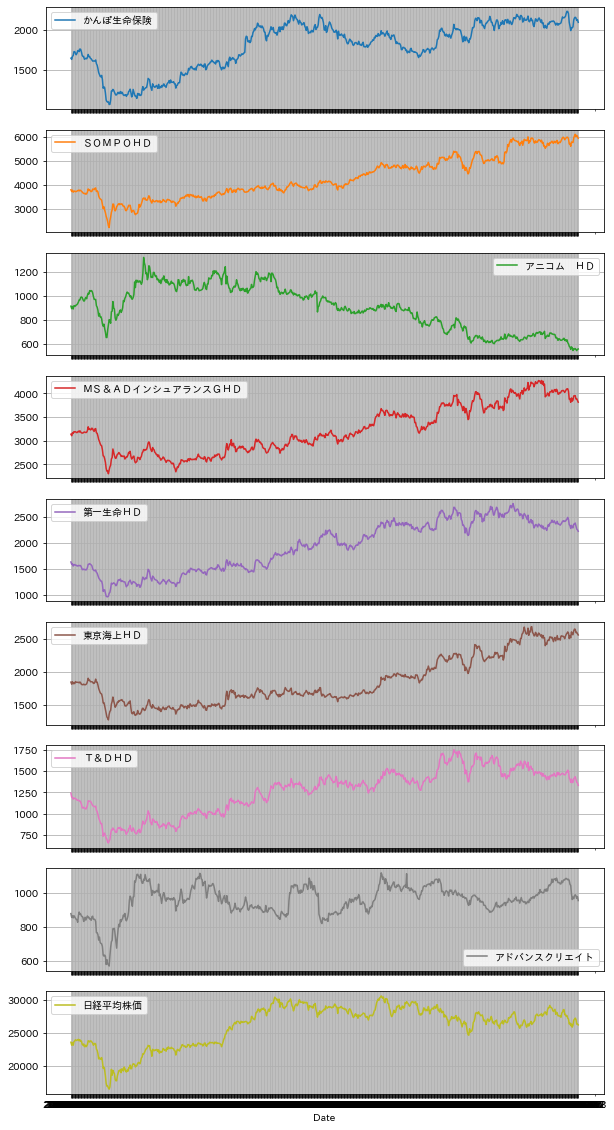

In [17]:
df.plot(figsize=(10, 20), subplots = True, grid = True)
plt.savefig('生損保・東証プライム時系列データ.png');

In [18]:
#（要選択）日次のリターンを算定（★四則演算による通常のリターン計算）
#df_rate = df.pct_change()
#df_rate = df_rate.dropna()
#df_rate

In [19]:
#（要選択）日次のリターンを算定（★自然対数収益率によるリターン計算）
lndf = np.log(df)
df_rate = lndf.diff()
# df_rate = df_rate.dropna()
df_rate

,かんぽ生命保険,ＳＯＭＰＯＨＤ,アニコム ＨＤ,ＭＳ＆ＡＤインシュアランスＧＨＤ,第一生命ＨＤ,東京海上ＨＤ,Ｔ＆ＤＨＤ,アドバンスクリエイト,日経平均株価
Date,,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.009172,-0.018780,-0.023337,-0.010299,-0.027345,-0.017142,-0.039479,-0.025711,-0.019281
2020-01-07,0.022509,0.014118,0.020619,0.019397,0.007609,0.020406,-0.001492,0.010793,0.015856
2020-01-08,0.006339,-0.021730,-0.023401,-0.004125,-0.029054,-0.017086,-0.018847,-0.014054,-0.015860
2020-01-09,0.028551,0.009506,0.030181,0.012052,0.014632,0.009072,0.009845,0.014591,0.022798
...,...,...,...,...,...,...,...,...,...
2022-10-06,0.004175,0.010731,0.007156,0.000759,0.007396,-0.001324,0.009790,0.006073,0.007010
2022-10-07,-0.004175,-0.016223,-0.016173,-0.018124,-0.024724,-0.019106,-0.023232,-0.006073,-0.007173
2022-10-11,-0.014989,0.009468,-0.016439,0.001802,-0.024908,0.001349,-0.023056,-0.015346,-0.026717


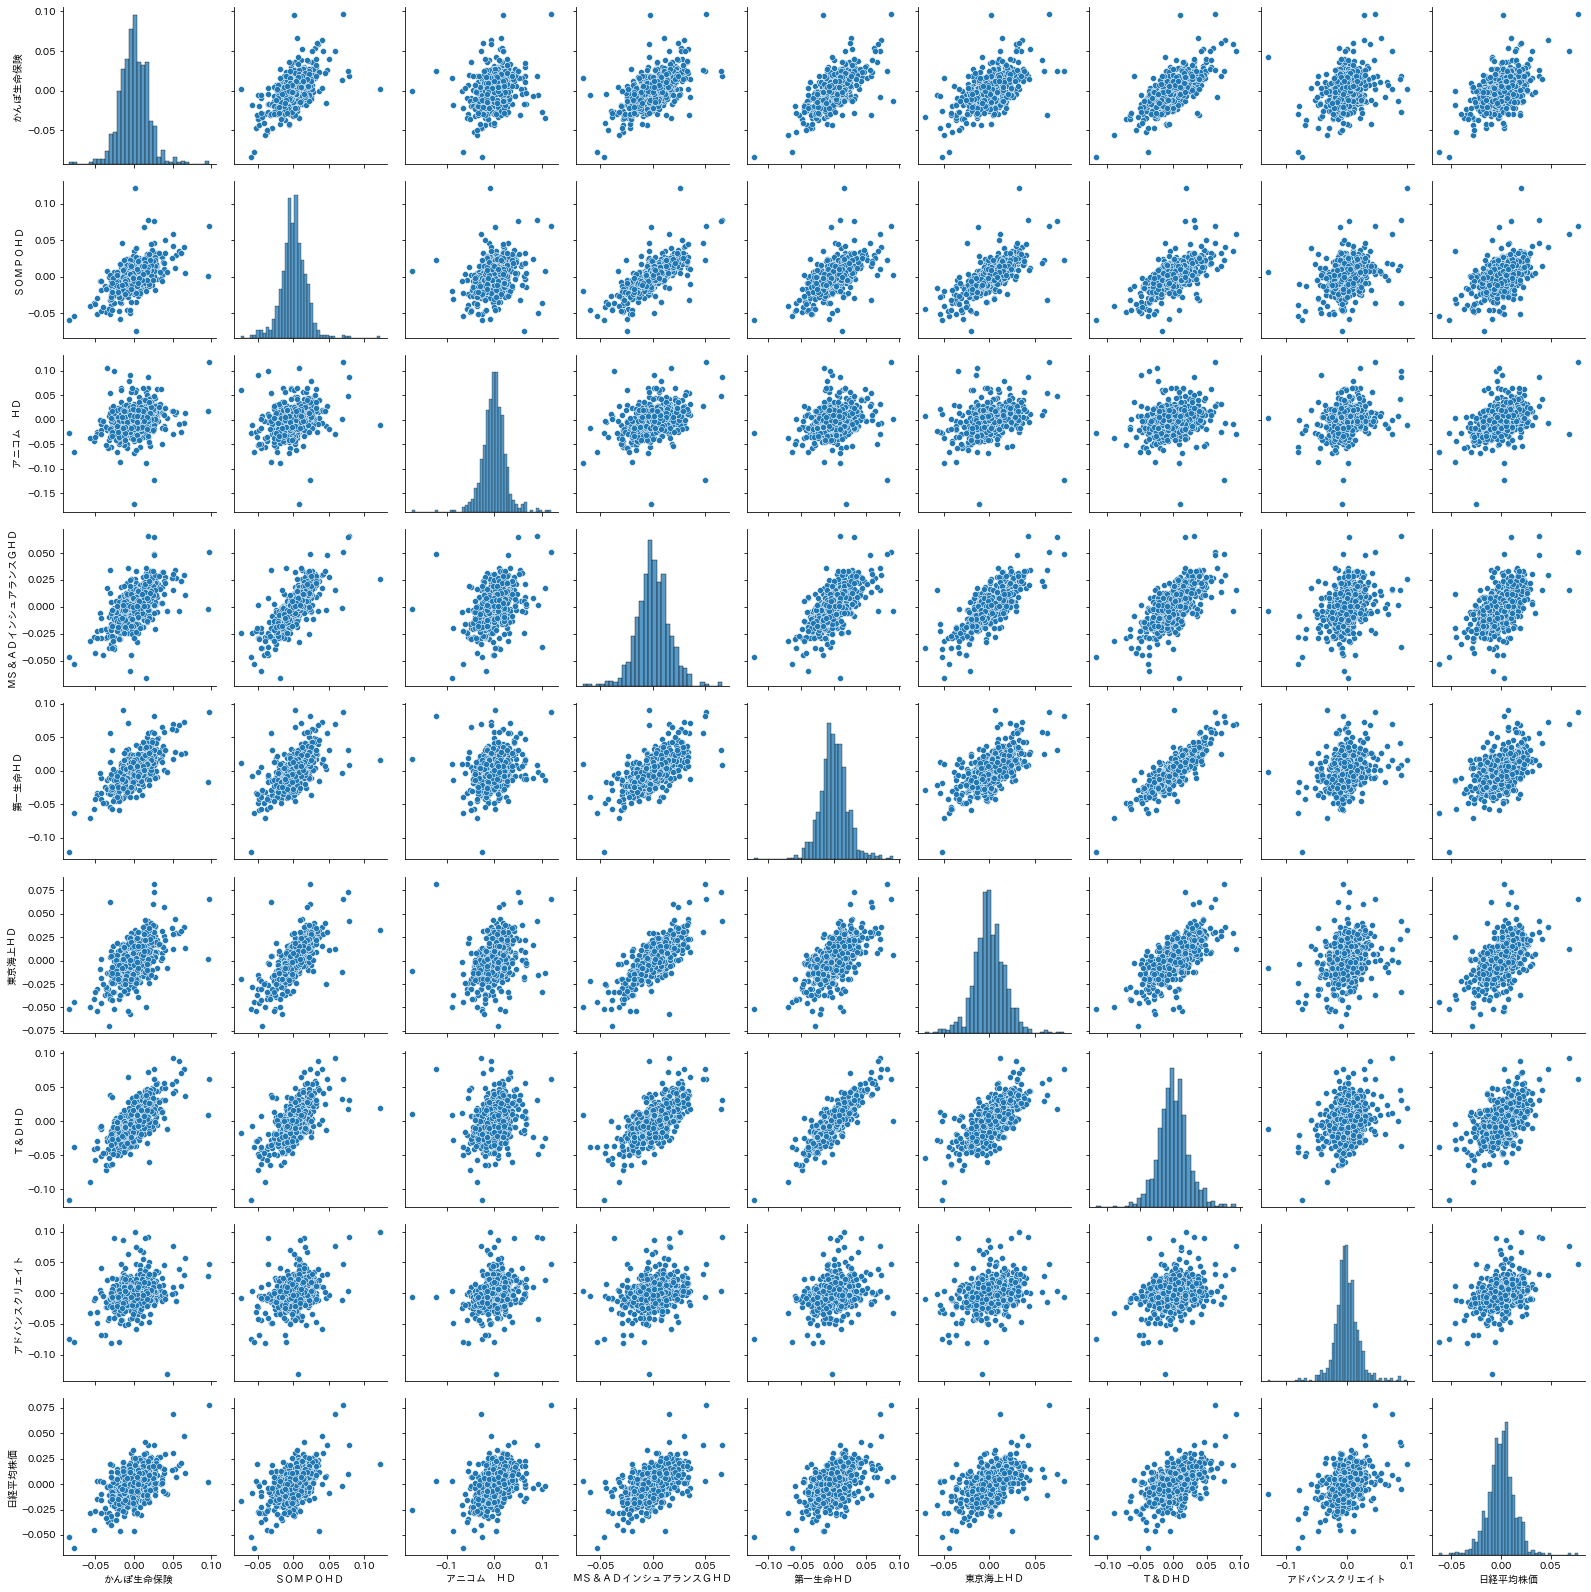

In [20]:
#★★実行注意・時間がかかる（要選択）株価リターンと株価リターンの相関グラフ
import seaborn as sns

sns.pairplot(df_rate)

In [21]:
# コード3.23 スピアマンの順位相関係数
rank_corr = df_rate.corr(method='spearman')
pd.options.display.precision = 3  # 小数桁数の指定
rank_corr

,かんぽ生命保険,ＳＯＭＰＯＨＤ,アニコム ＨＤ,ＭＳ＆ＡＤインシュアランスＧＨＤ,第一生命ＨＤ,東京海上ＨＤ,Ｔ＆ＤＨＤ,アドバンスクリエイト,日経平均株価
かんぽ生命保険,1.000,0.583,0.310,0.597,0.661,0.566,0.687,0.279,0.452
ＳＯＭＰＯＨＤ,0.583,1.000,0.359,0.775,0.647,0.755,0.662,0.322,0.533
アニコム ＨＤ,0.310,0.359,1.000,0.401,0.324,0.384,0.303,0.286,0.441
ＭＳ＆ＡＤインシュアランスＧＨＤ,0.597,0.775,0.401,1.000,0.658,0.769,0.670,0.347,0.535
第一生命ＨＤ,0.661,0.647,0.324,0.658,1.000,0.632,0.845,0.292,0.497
東京海上ＨＤ,0.566,0.755,0.384,0.769,0.632,1.000,0.671,0.308,0.540
Ｔ＆ＤＨＤ,0.687,0.662,0.303,0.670,0.845,0.671,1.000,0.308,0.513
アドバンスクリエイト,0.279,0.322,0.286,0.347,0.292,0.308,0.308,1.000,0.399
日経平均株価,0.452,0.533,0.441,0.535,0.497,0.540,0.513,0.399,1.000


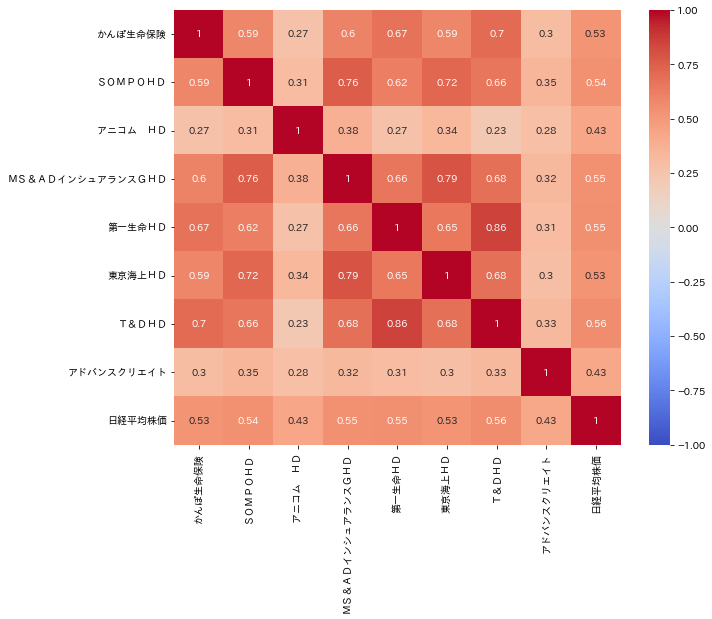

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df_rate.corr()
fig = plt.subplots(figsize=(10,8))
#heatmap = sns.heatmap(corr_mat, annot=True, square=True, cmap='bwr')
#ヒートマップ 
sns.heatmap(corr_mat, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

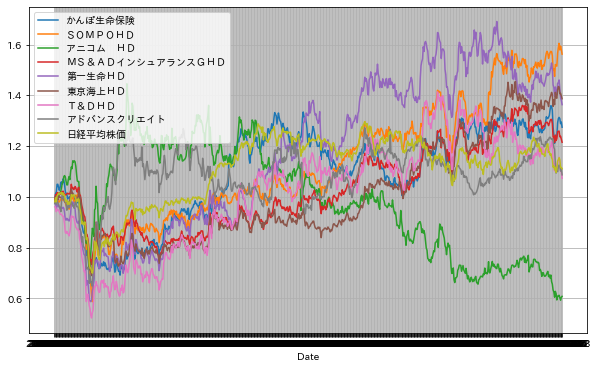

In [23]:
#累積リターン株価推移
df_rate.cumsum().apply(np.exp).plot(figsize=(10, 6));  
plt.grid();
plt.savefig('fts_03.png');

In [24]:
#df_rate_mean = (df_rate.dropna().mean() + 1.0)**250-1.0
df_rate_mean = (df_rate.mean() + 1.0)**250-1.0
df_rate_mean

かんぽ生命保険             0.094
ＳＯＭＰＯＨＤ             0.179
アニコム　ＨＤ            -0.168
ＭＳ＆ＡＤインシュアランスＧＨＤ    0.075
第一生命ＨＤ              0.121
東京海上ＨＤ              0.128
Ｔ＆ＤＨＤ               0.026
アドバンスクリエイト          0.031
日経平均株価              0.040
dtype: float64

In [25]:
#df_rate_std = df_rate.dropna().std()*np.sqrt(250)
df_rate_std = df_rate.std()*np.sqrt(250)
df_rate_std

かんぽ生命保険             0.294
ＳＯＭＰＯＨＤ             0.291
アニコム　ＨＤ             0.400
ＭＳ＆ＡＤインシュアランスＧＨＤ    0.244
第一生命ＨＤ              0.346
東京海上ＨＤ              0.280
Ｔ＆ＤＨＤ               0.373
アドバンスクリエイト          0.339
日経平均株価              0.221
dtype: float64

In [26]:
df_rate_ratio = df_rate_mean / df_rate_std
df_rate_ratio

かんぽ生命保険             0.318
ＳＯＭＰＯＨＤ             0.616
アニコム　ＨＤ            -0.420
ＭＳ＆ＡＤインシュアランスＧＨＤ    0.306
第一生命ＨＤ              0.350
東京海上ＨＤ              0.459
Ｔ＆ＤＨＤ               0.071
アドバンスクリエイト          0.092
日経平均株価              0.179
dtype: float64

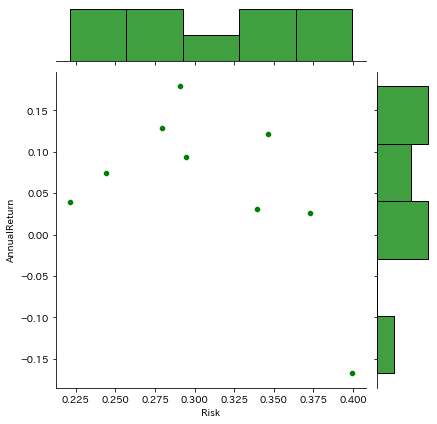

In [27]:
#リスク＆リターン散布図
import seaborn as sns

v_m = pd.DataFrame({'Risk':df_rate_std, 'AnnualReturn':df_rate_mean})
sns.jointplot(x = 'Risk', y = 'AnnualReturn', data=v_m, color="g")

In [28]:
df_rate_std.index.values

array(['かんぽ生命保険', 'ＳＯＭＰＯＨＤ', 'アニコム\u3000ＨＤ', 'ＭＳ＆ＡＤインシュアランスＧＨＤ', '第一生命ＨＤ',
       '東京海上ＨＤ', 'Ｔ＆ＤＨＤ', 'アドバンスクリエイト', '日経平均株価'], dtype=object)

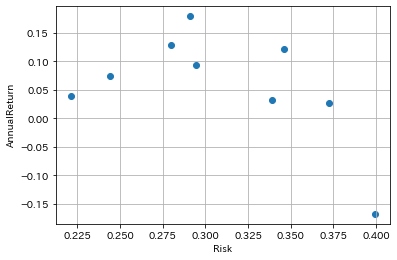

In [29]:
#リスク＆リターン散布図
# 各要素にDataFrameのインデックスの数字をラベルとして付ける
#for i, txt in enumerate(df_rate_std.index.values):
#    plt.annotate(txt, df_rate_std.values[i], df_rate_mean.values[i])
plt.grid()
plt.xlabel("Risk")
plt.ylabel("AnnualReturn")
plt.scatter(df_rate_std, df_rate_mean)
plt.show()

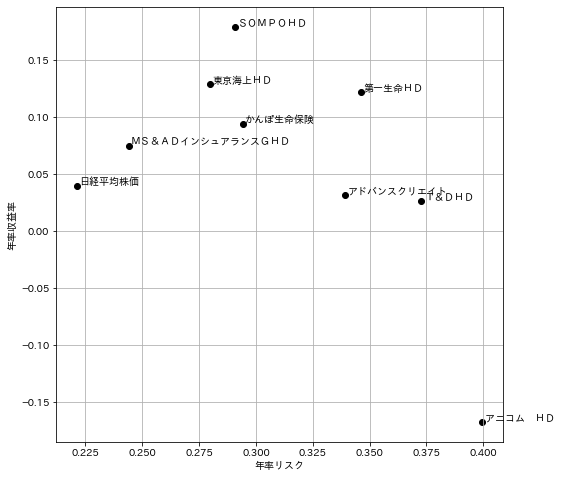

In [30]:
#リスク＆リターン散布図
# 集計データの結合
xy = pd.concat([df_rate_std, df_rate_mean], axis=1)
xy.columns = ['年率リスク', '年率収益率']
# パーセント表示のための設定
pd.options.display.float_format = '{: <10.1%}'.format
# 結果の出力
#xy

# ラベル付き散布図作成
plt.figure(figsize=[8, 8])
plt.scatter(xy['年率リスク'], xy['年率収益率'], color='black')
plt.xlabel('年率リスク')
plt.ylabel('年率収益率')
plt.grid()

for i, j in xy.iterrows():
    plt.annotate(i, xy=(j[0]+0.001, j[1]+0.001))

plt.savefig('sub_positioning.eps', bbox_inches='tight',dpi=600)

In [31]:
df_rate

,かんぽ生命保険,ＳＯＭＰＯＨＤ,アニコム ＨＤ,ＭＳ＆ＡＤインシュアランスＧＨＤ,第一生命ＨＤ,東京海上ＨＤ,Ｔ＆ＤＨＤ,アドバンスクリエイト,日経平均株価
Date,,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.9%,-1.9%,-2.3%,-1.0%,-2.7%,-1.7%,-3.9%,-2.6%,-1.9%
2020-01-07,2.3%,1.4%,2.1%,1.9%,0.8%,2.0%,-0.1%,1.1%,1.6%
2020-01-08,0.6%,-2.2%,-2.3%,-0.4%,-2.9%,-1.7%,-1.9%,-1.4%,-1.6%
2020-01-09,2.9%,1.0%,3.0%,1.2%,1.5%,0.9%,1.0%,1.5%,2.3%
...,...,...,...,...,...,...,...,...,...
2022-10-06,0.4%,1.1%,0.7%,0.1%,0.7%,-0.1%,1.0%,0.6%,0.7%
2022-10-07,-0.4%,-1.6%,-1.6%,-1.8%,-2.5%,-1.9%,-2.3%,-0.6%,-0.7%
2022-10-11,-1.5%,0.9%,-1.6%,0.2%,-2.5%,0.1%,-2.3%,-1.5%,-2.7%


### OLS Regression

In [ ]:
df_rate = df_rate.dropna()

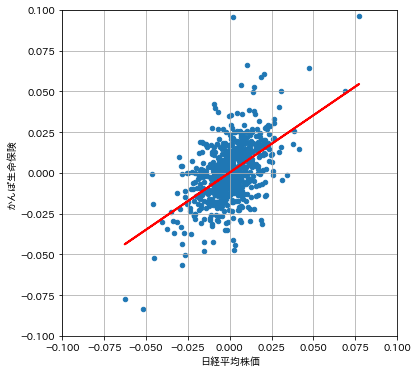

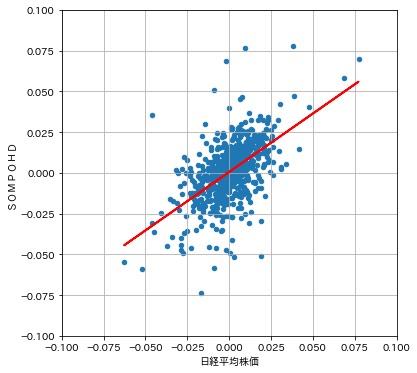

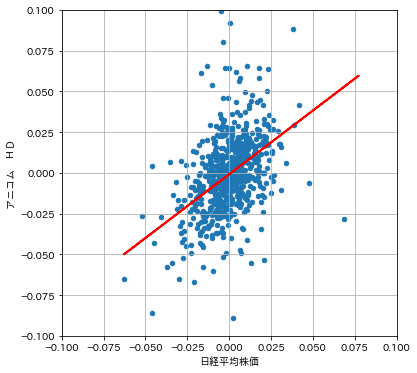

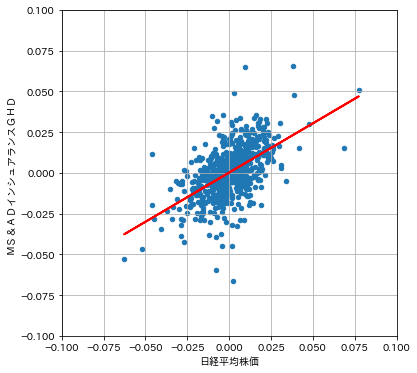

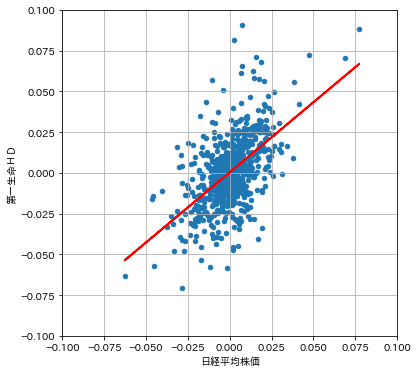

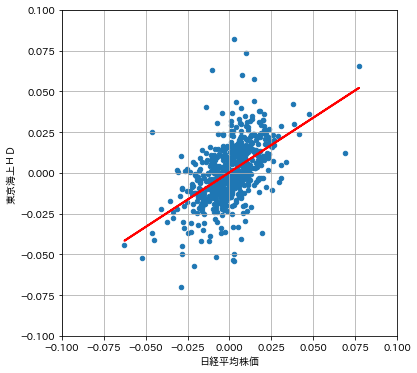

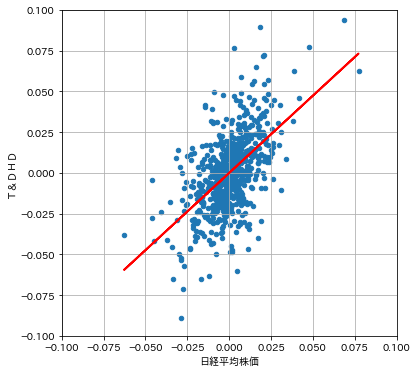

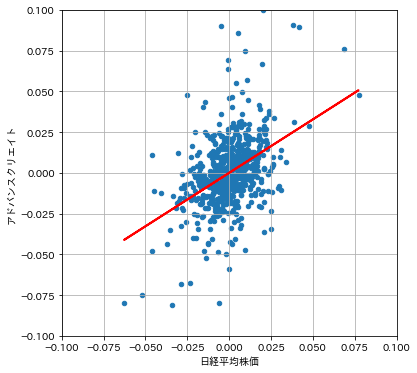

In [35]:
for code in df_list['銘柄名']:
  #reg = np.polyfit(df_rate_nk225['Adj Close'], df_rate[code], deg=1)
  reg = np.polyfit(df_rate['日経平均株価'], df_rate[code], deg=1)
  ax = df_rate.plot(kind='scatter', x='日経平均株価', y=code, figsize=(6, 6))
  #ax = df_rate.plot(kind='scatter', x='1343.T', y=code, figsize=(6, 6)) 
  #ax.plot(df_rate_nk225['Adj Close'], np.polyval(reg, df_rate_nk225['Adj Close']), 'r', lw=2);
  ax.plot(df_rate['日経平均株価'], np.polyval(reg, df_rate['日経平均株価']), 'r', lw=2);
  plt.xlim(-0.1, 0.1);
  plt.ylim(-0.1, 0.1);
  plt.grid()
  plt.savefig('fts_12_' + code + '.png');

In [ ]:
#df_rate['日経平均株価']
df_rate['かんぽ生命保険']

In [36]:
df_list['銘柄名']

2932             かんぽ生命保険
3649             ＳＯＭＰＯＨＤ
3661             アニコム　ＨＤ
3662    ＭＳ＆ＡＤインシュアランスＧＨＤ
3669              第一生命ＨＤ
3670              東京海上ＨＤ
3677               Ｔ＆ＤＨＤ
3678          アドバンスクリエイト
Name: 銘柄名, dtype: object

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

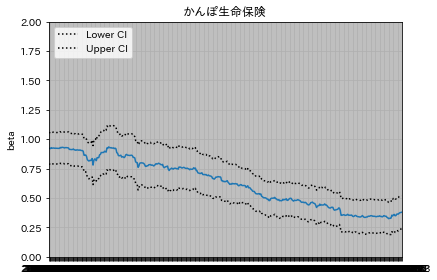

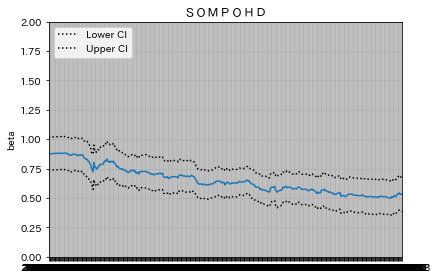

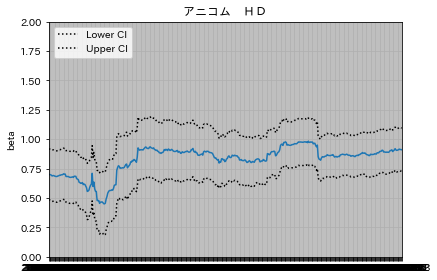

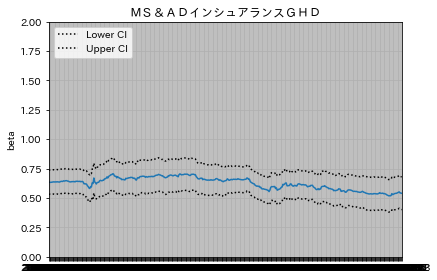

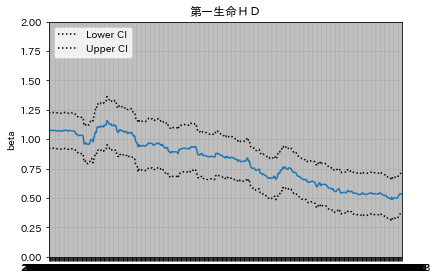

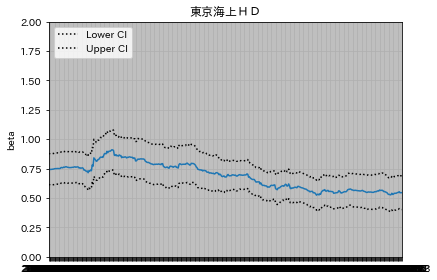

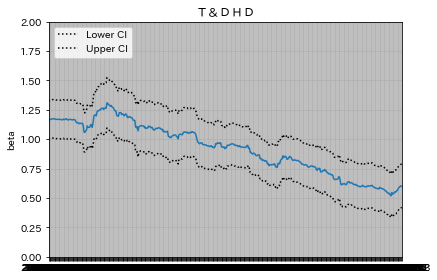

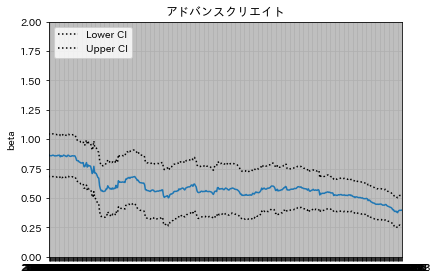

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

x = df_rate['日経平均株価']
#for code in symbols:
for code in df_list['銘柄名']:
  y = df_rate[code]

  model = RollingOLS(y, sm.add_constant(x), window=246)
  res = model.fit()
  params = res.params
  fig = res.plot_recursive_coefficient(variables = ['日経平均株価'])
# figは図全体のオブジェクトで、内部には複数のsubplotを持てるが、
# 今回は1つのsubplotのみで構成されているので、そのsubplotは
# fig.axes[0]で取得できる。
  ax = fig.axes[0]
  ax.grid()
  ax.set_title(f'{code}')
  ax.set_ylim(0, 2.0)
  ax.set_ylabel('beta')